In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

In [23]:
train_df = pd.read_csv("C:\\Users\\Uday Kiran\\Downloads\\train (2).csv", index_col="PassengerId")


In [24]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train_df["Cabin"] = train_df["Cabin"].str[0]

In [26]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

In [27]:
X_data = pd.get_dummies(data=train_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]])

In [28]:
columns_to_drop = ["Cabin_T", "Embarked_C", "Embarked_Q", "Embarked_S"]  # Adjust as needed
X_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [29]:
y_data = train_df["Survived"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7, shuffle=True, random_state=42)

In [31]:
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred_rf = classifier_rf.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.7686567164179104


In [33]:
clf_xgboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
clf_xgboost.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [34]:
y_pred_xgboost = clf_xgboost.predict(X_test)
accuracy_xgboost = metrics.accuracy_score(y_test, y_pred_xgboost)
print("XGBoost Accuracy:", accuracy_xgboost)

XGBoost Accuracy: 0.8134328358208955


In [35]:
# Compare accuracies and print the better performing algorithm
if accuracy_rf > accuracy_xgboost:
    print("Random Forest provides better accuracy.")
else:
    print("XGBoost provides better accuracy.")

XGBoost provides better accuracy.


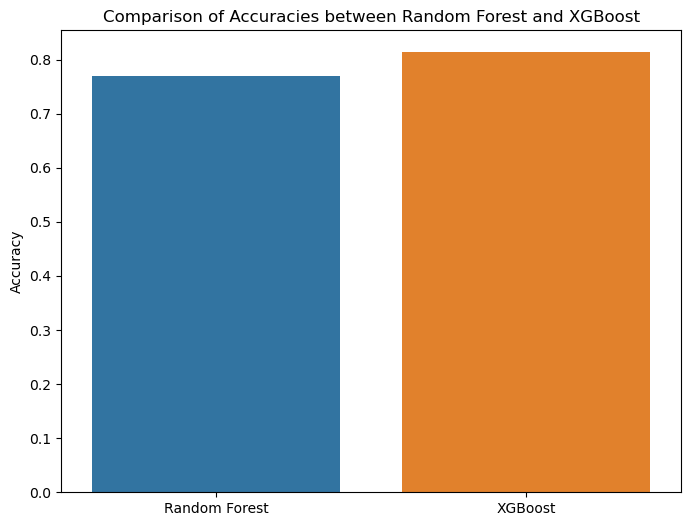

In [21]:
accuracies = [accuracy_rf, accuracy_xgboost]
algorithms = ["Random Forest", "XGBoost"]

plt.figure(figsize=(8, 6))
sns.barplot(x=algorithms, y=accuracies)
plt.title("Comparison of Accuracies between Random Forest and XGBoost")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
s